In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the .csv files
df_train = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df_test = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

### Encoding, data cleaning and feature engineering

In [3]:
# Label Encoding the training data
df_train['Outlet_Size'].replace(['Small','Medium','High'],[1,2,3], inplace = True)
df_train['Outlet_Location_Type'].replace(['Tier 1','Tier 2','Tier 3'],[1,2,3], inplace = True)
df_train['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'LF', 'reg','low fat'],[0,1,0,1,0],inplace = True)
df_train = df_train.drop('Item_Identifier', axis = 1)
df_train = df_train.drop('Outlet_Type', axis = 1)
#df_train

# Label Encoding the Testing Data
df_test['Outlet_Size'].replace(['Small','Medium','High'],[1,2,3], inplace = True)
df_test['Outlet_Location_Type'].replace(['Tier 1','Tier 2','Tier 3'],[1,2,3], inplace = True)
df_test['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'LF', 'reg','low fat'],[0,1,0,1,0],inplace = True)
df_test = df_test.drop('Item_Identifier', axis = 1)
df_test = df_test.drop('Outlet_Type', axis = 1)
#df_test

In [4]:
#df_train.isna().sum()
# Dealing with the Null Values
df_train['Item_Weight'].fillna(int(df_train['Item_Weight'].mean()), inplace = True)
df_test['Item_Weight'].fillna(int(df_test['Item_Weight'].mean()), inplace = True)

df_train['Outlet_Size'].fillna(int(df_test['Outlet_Size'].mean()), inplace = True)
df_test['Outlet_Size'].fillna(int(df_test['Outlet_Size'].mean()), inplace = True)

#df_train = df_train.drop('Outlet_Establishment_Year',axis = 1)
#df_test = df_test.drop('Outlet_Establishment_Year',axis = 1)

In [5]:
years_of_service = 2022 - df_train['Outlet_Establishment_Year']
df_train['YoS'] = years_of_service
df_train = df_train.drop('Outlet_Establishment_Year',axis = 1)

years_of_service = 2022 - df_test['Outlet_Establishment_Year']
df_test['YoS'] = years_of_service
df_test = df_test.drop('Outlet_Establishment_Year',axis = 1)

### Exploratory Data Analysis

In [6]:
df_train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,YoS
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.710428,0.352693,0.066132,140.992782,1.546404,2.112871,2181.288914,24.168133
std,4.238481,0.477836,0.051598,62.275067,0.683084,0.812757,1706.499616,8.371760
min,4.555000,0.000000,0.000000,31.290000,1.000000,1.000000,33.290000,13.000000
25%,9.310000,0.000000,0.026989,93.826500,1.000000,1.000000,834.247400,18.000000
50%,12.000000,0.000000,0.053931,143.012800,1.000000,2.000000,1794.331000,23.000000
75%,16.000000,1.000000,0.094585,185.643700,2.000000,3.000000,3101.296400,35.000000
max,21.350000,1.000000,0.328391,266.888400,3.000000,3.000000,13086.964800,37.000000


<AxesSubplot:>

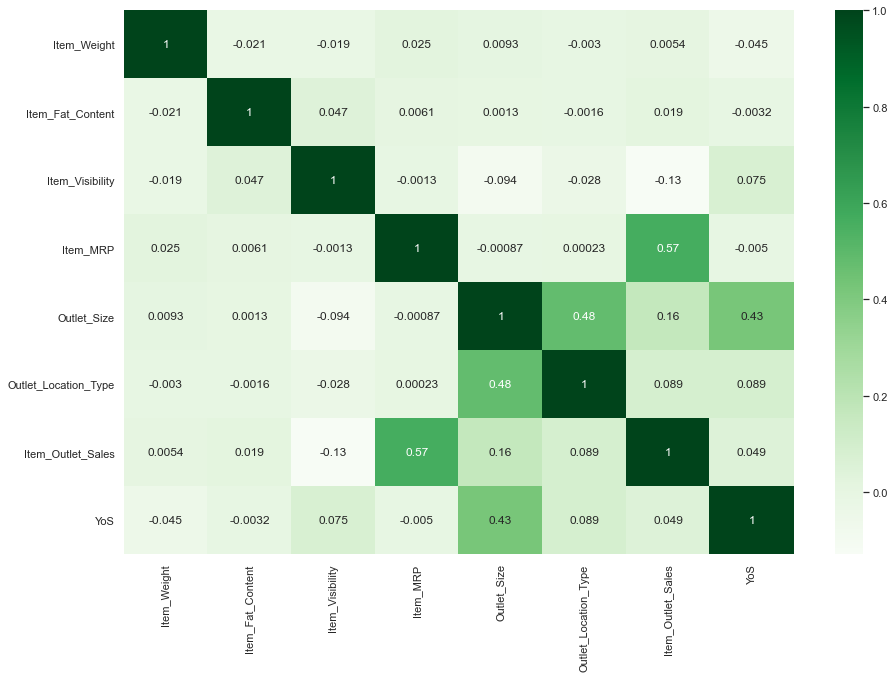

In [10]:
cor = df_train.corr()
plt.figure(figsize =(15,10))
sns.heatmap(cor, cmap = 'Greens',annot = True)

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Fat_Content'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Size'}>,
        <AxesSubplot:title={'center':'Outlet_Location_Type'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:title={'center':'YoS'}>, <AxesSubplot:>]],
      dtype=object)

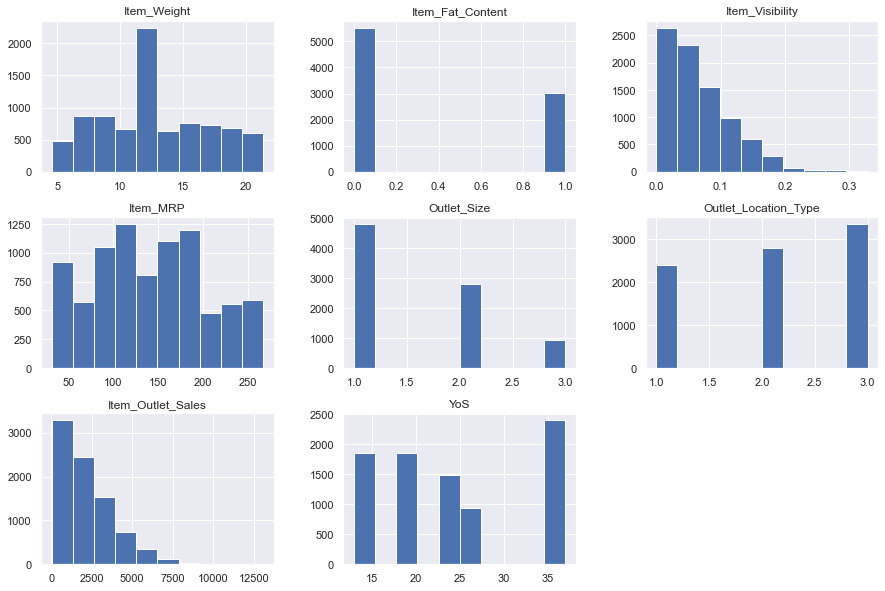

In [8]:
sns.set_theme(style ='darkgrid')
df_train.hist(figsize = (15,10))

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

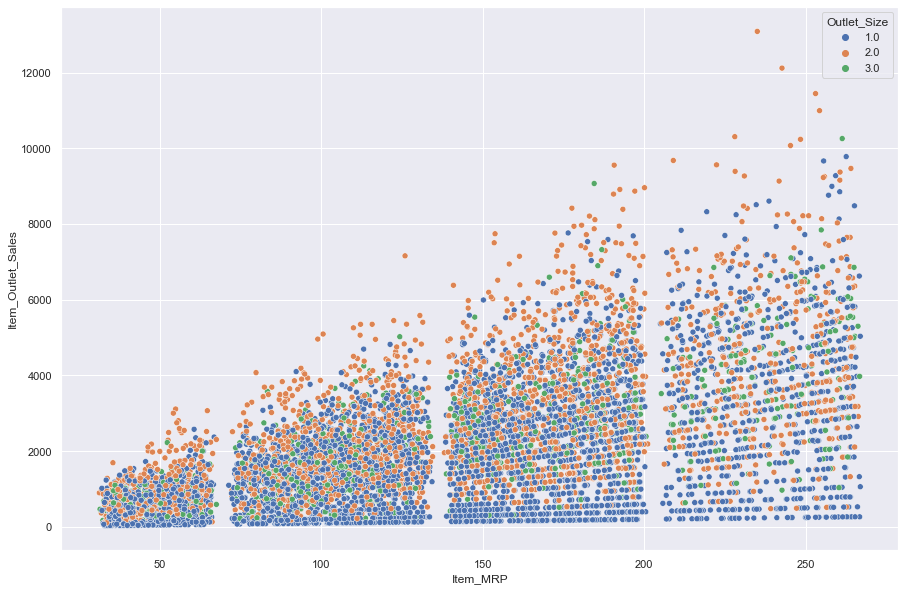

In [11]:
plt.figure(figsize =(15,10))
sns.scatterplot(x = df_train['Item_MRP'],y = df_train['Item_Outlet_Sales'],hue = df_train['Outlet_Size'],palette = 'deep')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

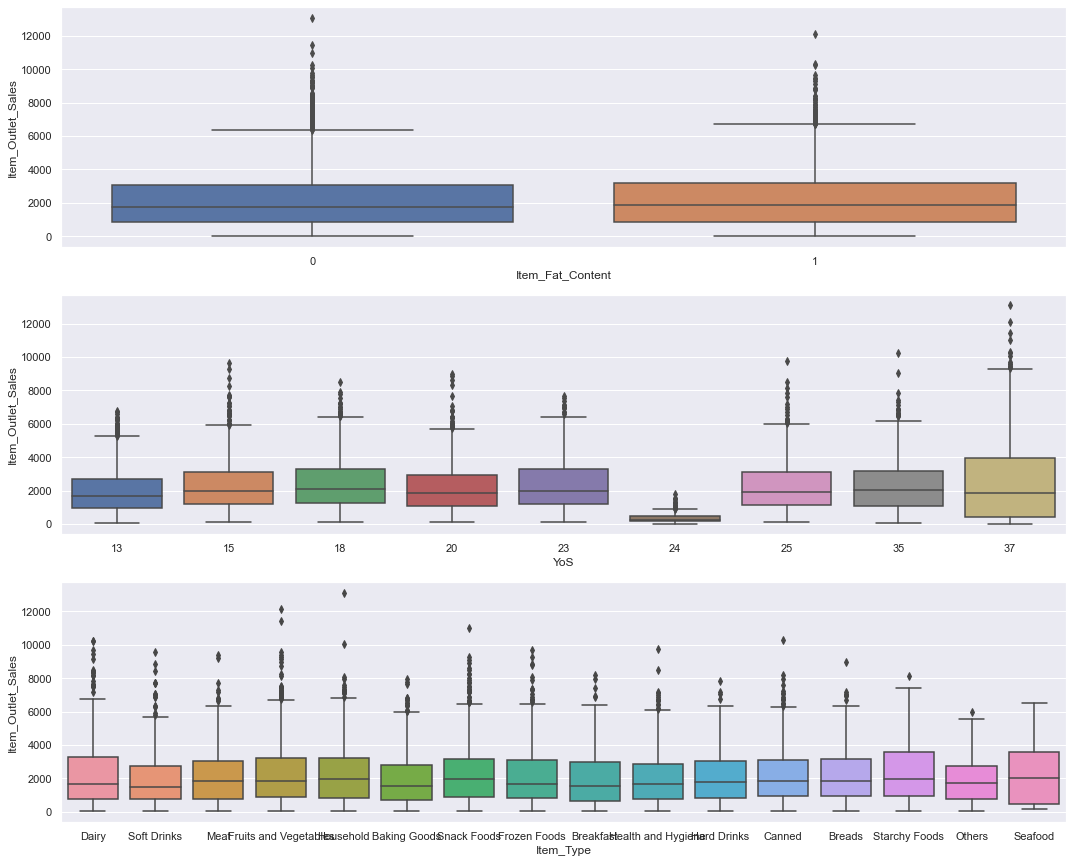

In [12]:
fig, axx = plt.subplots(3,1,figsize =(18,15))
sns.boxplot(x = df_train['Item_Fat_Content'],y = df_train['Item_Outlet_Sales'],ax = axx[0])
sns.boxplot(x = df_train['YoS'],y = df_train['Item_Outlet_Sales'],ax = axx[1])
sns.boxplot(x = df_train['Item_Type'],y = df_train['Item_Outlet_Sales'],ax = axx[2])

### Model training and Evaluation

In [13]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,YoS
0,9.300,0,0.016047,Dairy,249.8092,OUT049,2.0,1,3735.1380,23
1,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2.0,3,443.4228,13
2,17.500,0,0.016760,Meat,141.6180,OUT049,2.0,1,2097.2700,23
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1.0,3,732.3800,24
4,8.930,0,0.000000,Household,53.8614,OUT013,3.0,3,994.7052,35
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,OUT013,3.0,3,2778.3834,35
8519,8.380,1,0.046982,Baking Goods,108.1570,OUT045,1.0,2,549.2850,20
8520,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,1.0,2,1193.1136,18
8521,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2.0,3,1845.5976,13


In [14]:
#Sorting the Data Frame into outlets by the Outlet_Identifier
data_frame = []
df_train['Outlet_Identifier'].unique()
for i in df_train['Outlet_Identifier'].unique():
    df = df_train.loc[df_train['Outlet_Identifier'] == i]
    data_frame.append(df)

# Product wise creation of data_frames
data_train_list = []
for df in data_frame:
    for i in df['Item_Type'].unique():
        data_train_list.append(df.loc[df['Item_Type'] == i])

#Sorting the Data Frame into outlets by the Outlet_Identifier
test_data_frame = []
#df_test['Outlet_Identifier'].unique()
for i in df_test['Outlet_Identifier'].unique():
    df = df_test.loc[df_test['Outlet_Identifier'] == i]
    test_data_frame.append(df)

# Product wise creation of data_frames
data_test_list = []
for df in test_data_frame:
    for i in df['Item_Type'].unique():
        data_test_list.append(df.loc[df['Item_Type'] == i])

In [15]:
# Fitting a linear Regression Model
score_list = []
lr_score_list = []
for df in data_train_list:
    Y_train = pd.DataFrame(df['Item_Outlet_Sales'])
    X_train = pd.DataFrame(df.drop(['Item_Type','Outlet_Identifier','Item_Outlet_Sales'],axis = 1))
    lr_model = LinearRegression()
    lr_model.fit(X_train,Y_train)
    Y_pred = lr_model.predict(X_train)
    lr_score_list.append(lr_model.score(X_train,Y_train))

accuracy = sum(lr_score_list)/len(lr_score_list)
score_list.append(accuracy)
print("The Net Accuracy of the Linear Regression model is {}".format(accuracy))

# Fitting a Ridge Regression Model
ridge_score_list = []
for df in data_train_list:
    Y_train = pd.DataFrame(df['Item_Outlet_Sales'])
    X_train = pd.DataFrame(df.drop(['Item_Type','Outlet_Identifier','Item_Outlet_Sales'],axis = 1))
    ridge_model = Ridge(0.01)
    ridge_model.fit(X_train,Y_train)
    ridge_score_list.append(ridge_model.score(X_train,Y_train))

accuracy = sum(ridge_score_list)/len(ridge_score_list)
score_list.append(accuracy)
print("The Net Accuracy of the Ridge Regression model is {}".format(accuracy))

# Fitting a Lasso Regression Model
lasso_score_list = []
for df in data_train_list:
    Y_train = pd.DataFrame(df['Item_Outlet_Sales'])
    X_train = pd.DataFrame(df.drop(['Item_Type','Outlet_Identifier','Item_Outlet_Sales'],axis = 1))
    lasso_model = Lasso(0.1,max_iter = 1000000)
    lasso_model.fit(X_train,Y_train)
    lasso_score_list.append(lasso_model.score(X_train,Y_train))

accuracy = sum(lasso_score_list)/len(lasso_score_list)
score_list.append(accuracy)
print("The Net Accuracy of the Lasso Regression model is {}".format(accuracy))

# Fitting a Decision Tree Regressor Model
dtr_score_list = []
for df in data_train_list:
    Y_train = pd.DataFrame(df['Item_Outlet_Sales'])
    X_train = pd.DataFrame(df.drop(['Item_Type','Outlet_Identifier','Item_Outlet_Sales'],axis = 1))
    dtr_model = DecisionTreeRegressor(max_depth = 3)
    dtr_model.fit(X_train,Y_train)
    Y_pred = dtr_model.predict(X_train)
    dtr_score_list.append(dtr_model.score(X_train,Y_train))
accuracy = sum(dtr_score_list)/len(dtr_score_list)
score_list.append(accuracy)
print("The Net Accuracy of the Decision Tree Regression model is {}".format(accuracy))

# Fitting XGBRegressor
xgbr_score_list = []
for df in data_train_list:
    Y_train = pd.DataFrame(df['Item_Outlet_Sales'])
    X_train = pd.DataFrame(df.drop(['Item_Type','Outlet_Identifier','Item_Outlet_Sales'],axis = 1))
    xgbr_model = XGBRegressor()
    xgbr_model.fit(X_train,Y_train)
    Y_pred = xgbr_model.predict(X_train)
    xgbr_score_list.append(xgbr_model.score(X_train,Y_train))

accuracy = sum(xgbr_score_list)/len(xgbr_score_list)
score_list.append(accuracy)
print("The Net Accuracy of the XBGRegressor model is {}".format(accuracy))

The Net Accuracy of the Linear Regression model is 0.540394829945299
The Net Accuracy of the Ridge Regression model is 0.5356244189570021
The Net Accuracy of the Lasso Regression model is 0.540369021424304
The Net Accuracy of the Decision Tree Regression model is 0.7715201008826362
The Net Accuracy of the XBGRegressor model is 0.9999997564816141
